<a href="https://colab.research.google.com/github/Deepak-Singh-Chauhan/Machine-Learning/blob/main/Walmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart sale

In [ ]:
dataset_url = 'https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(dataset_url)

('C:\\Users\\priya\\AppData\\Local\\Temp\\tmpb894pol6',
 <http.client.HTTPMessage at 0x1bd471c7790>)

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\walmart-recruiting-store-sales-forecasting" (use force=True to force download)


In [ ]:
data_dir = './walmart-recruiting-store-sales-forecasting'

In [ ]:
import os
os.listdir(data_dir)

['features.csv.zip',
 'sampleSubmission.csv.zip',
 'stores.csv',
 'test.csv.zip',
 'train.csv.zip']

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_dir

'./walmart-recruiting-store-sales-forecasting'

In [ ]:
stores=pd.read_csv(data_dir + '/stores.csv')
stores.tail(2)

,Store,Type,Size
43,44,C,39910
44,45,B,118221


In [ ]:
train=pd.read_csv(data_dir + '/train.csv.zip')
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
features = pd.read_csv(data_dir+ '/features.csv.zip')
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
sample_sub=pd.read_csv(data_dir+'/sampleSubmission.csv.zip')
sample_sub

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [ ]:
test=pd.read_csv(data_dir+'/test.csv.zip')

Now we are going to merge train and test datasets with store and features dataset to prepare a proper dataset for training of the model.


In [ ]:
train=train.merge(stores, how = 'left')\
     .merge(features, how = 'left')

In [ ]:
train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [ ]:
test=test.merge(stores, how = 'left')\
     .merge(features, how = 'left')


In [ ]:
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


The date column can give some useful insights to the data so i have converted it into date data type for better usability.

In [ ]:
train['Date']=pd.to_datetime(train.Date)
train['year'] = pd.DatetimeIndex(train.Date).year
train['month'] = pd.DatetimeIndex(train.Date).month
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10


In [ ]:
test['Date']=pd.to_datetime(test.Date)
test['year'] = pd.DatetimeIndex(test.Date).year
test['month'] = pd.DatetimeIndex(test.Date).month
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,2012,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,2013,6
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,2013,7
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,2013,7
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,2013,7


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

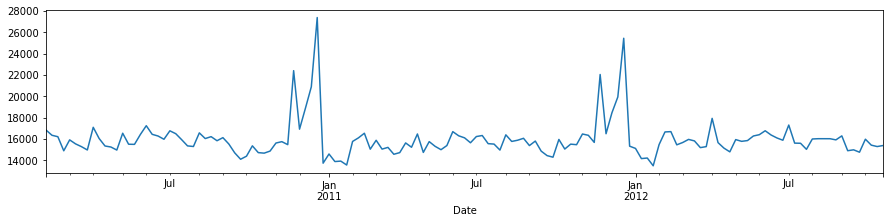

In [ ]:
plt.figure(figsize=(15,3))
train.groupby('Date')['Weekly_Sales'].mean().plot();

In [ ]:
We can clearly see a spike in sales in december and that's due to holiday season most probably.

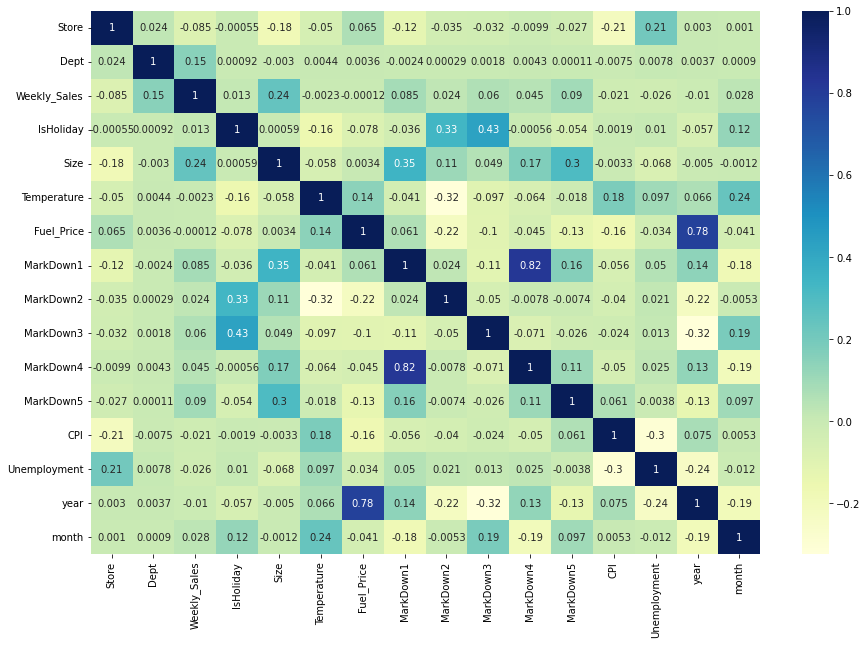

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True,ax=ax)

Now i will perform some feature engineering to make the data more suitable for out model

In [ ]:
numeric_cols=['Store','Dept','Size','Temperature','Fuel_Price','CPI','Unemployment','year','month']
cat_cols=['IsHoliday','Type']
target='Weekly_Sales'

I am going to fill in the missing values of various numeric columns by using Simple Imputer


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean').fit(train[numeric_cols])

In [ ]:
train[numeric_cols] = imputer.transform(train[numeric_cols])

In [ ]:
train[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
dtype: int64

Now i will convert categorical columns to numeric by using one hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train[cat_cols])


In [ ]:
encoded_cols = list(encoder.get_feature_names(cat_cols))

C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train[encoded_cols] = encoder.transform(train[cat_cols])

In [ ]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1.0,1.0,2010-02-05,24924.50,False,A,151315.0,42.31,2.572,NaN,...,NaN,211.096358,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,2010-02-12,46039.49,True,A,151315.0,38.51,2.548,NaN,...,NaN,211.242170,8.106,2010.0,2.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,2010-02-19,41595.55,False,A,151315.0,39.93,2.514,NaN,...,NaN,211.289143,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,2010-02-26,19403.54,False,A,151315.0,46.63,2.561,NaN,...,NaN,211.319643,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,2010-03-05,21827.90,False,A,151315.0,46.50,2.625,NaN,...,NaN,211.350143,8.106,2010.0,3.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,98.0,2012-09-28,508.37,False,B,118221.0,64.88,3.997,4556.61,...,3288.25,192.013558,8.684,2012.0,9.0,1.0,0.0,0.0,1.0,0.0
421566,45.0,98.0,2012-10-05,628.10,False,B,118221.0,64.89,3.985,5046.74,...,2340.01,192.170412,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421567,45.0,98.0,2012-10-12,1061.02,False,B,118221.0,54.47,4.000,1956.28,...,3990.54,192.327265,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421568,45.0,98.0,2012-10-19,760.01,False,B,118221.0,56.47,3.969,2004.02,...,1537.49,192.330854,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0


Now we will only use numerical data in the model so dropping remaining columns and saving new dataset in trainf

In [ ]:
trainf=train[numeric_cols+encoded_cols]
trainf

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1.0,1.0,151315.0,42.31,2.572,211.096358,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,151315.0,38.51,2.548,211.242170,8.106,2010.0,2.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,151315.0,39.93,2.514,211.289143,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,151315.0,46.63,2.561,211.319643,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,151315.0,46.50,2.625,211.350143,8.106,2010.0,3.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,98.0,118221.0,64.88,3.997,192.013558,8.684,2012.0,9.0,1.0,0.0,0.0,1.0,0.0
421566,45.0,98.0,118221.0,64.89,3.985,192.170412,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421567,45.0,98.0,118221.0,54.47,4.000,192.327265,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421568,45.0,98.0,118221.0,56.47,3.969,192.330854,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0


I am going to split the training data into train and validation set to improve the model by tuning hyperparameters as required.


In [ ]:
h= trainf.year==2012
val1=trainf[h]
val=val1[val1.month>6]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [ ]:
val

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
126,1.0,1.0,151315.0,81.57,3.227,221.883779,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
127,1.0,1.0,151315.0,77.12,3.256,221.924158,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
128,1.0,1.0,151315.0,80.42,3.311,221.932727,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
129,1.0,1.0,151315.0,82.66,3.407,221.941295,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
130,1.0,1.0,151315.0,86.11,3.417,221.949864,6.908,2012.0,8.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,98.0,118221.0,64.88,3.997,192.013558,8.684,2012.0,9.0,1.0,0.0,0.0,1.0,0.0
421566,45.0,98.0,118221.0,64.89,3.985,192.170412,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421567,45.0,98.0,118221.0,54.47,4.000,192.327265,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421568,45.0,98.0,118221.0,56.47,3.969,192.330854,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train=pd.concat([trainf, val, val]).drop_duplicates(keep=False)
X_train

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1.0,1.0,151315.0,42.31,2.572,211.096358,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,151315.0,38.51,2.548,211.242170,8.106,2010.0,2.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,151315.0,39.93,2.514,211.289143,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,151315.0,46.63,2.561,211.319643,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,151315.0,46.50,2.625,211.350143,8.106,2010.0,3.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421548,45.0,98.0,118221.0,74.48,3.742,191.009171,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0
421549,45.0,98.0,118221.0,64.30,3.689,191.015533,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0
421550,45.0,98.0,118221.0,71.93,3.620,191.029973,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0
421551,45.0,98.0,118221.0,74.22,3.564,191.064610,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
h= train.year==2012
val1=train[h]
val2=val1[val1.month>6]
val_target=val2.Weekly_Sales

In [ ]:
val_target

126       17823.37
127       16566.18
128       16348.06
129       15731.18
130       16628.31
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 50328, dtype: float64

In [ ]:
val

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
126,1.0,1.0,151315.0,81.57,3.227,221.883779,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
127,1.0,1.0,151315.0,77.12,3.256,221.924158,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
128,1.0,1.0,151315.0,80.42,3.311,221.932727,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
129,1.0,1.0,151315.0,82.66,3.407,221.941295,6.908,2012.0,7.0,1.0,0.0,1.0,0.0,0.0
130,1.0,1.0,151315.0,86.11,3.417,221.949864,6.908,2012.0,8.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,98.0,118221.0,64.88,3.997,192.013558,8.684,2012.0,9.0,1.0,0.0,0.0,1.0,0.0
421566,45.0,98.0,118221.0,64.89,3.985,192.170412,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421567,45.0,98.0,118221.0,54.47,4.000,192.327265,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421568,45.0,98.0,118221.0,56.47,3.969,192.330854,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1.0,1.0,151315.0,42.31,2.572,211.096358,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,151315.0,38.51,2.548,211.242170,8.106,2010.0,2.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,151315.0,39.93,2.514,211.289143,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,151315.0,46.63,2.561,211.319643,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,151315.0,46.50,2.625,211.350143,8.106,2010.0,3.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421548,45.0,98.0,118221.0,74.48,3.742,191.009171,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0
421549,45.0,98.0,118221.0,64.30,3.689,191.015533,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0
421550,45.0,98.0,118221.0,71.93,3.620,191.029973,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0
421551,45.0,98.0,118221.0,74.22,3.564,191.064610,8.567,2012.0,6.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_t=train.loc[X_train.index]
X_target=X_t.Weekly_Sales
X_target

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421548      874.64
421549      713.50
421550      856.35
421551      622.62
421552      690.52
Name: Weekly_Sales, Length: 371242, dtype: float64

X_train is the final dataset we will use for training and val is the dataset to be used for validation of the model

 **Random Forest**

In [ ]:
def test_params(**params):
    model =RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, X_target)
    return model.score(X_train, X_target), model.score(val, val_target)


In [ ]:
test_params(n_estimators=70)

(0.9952932083184237, 0.9705288860071377)

In [ ]:
test_params(n_estimators=100)

(0.9953741009447803, 0.9710452223232756)

In [ ]:
test_params(n_estimators=150)

(0.9954685788482045, 0.970661184435839)

In [ ]:
%%time
test_params(n_estimators=200)

CPU times: user 12min 43s, sys: 7.88 s, total: 12min 51s
Wall time: 6min 33s


(0.9954788929727864, 0.9704749040313658)

N estimators of 100 value seem to be the best option as it gives the best accuracy and takes lesser time.

In [ ]:
%%time
test_params(max_depth=20)

CPU times: user 5min 16s, sys: 2.75 s, total: 5min 18s
Wall time: 2min 44s


(0.992094280576681, 0.9713879758992915)

In [ ]:
test_params(max_depth=40)

(0.9953730416937279, 0.9711158781109387)

In [ ]:
test_params(max_depth=10)

(0.8865440219689203, 0.9049883937279958)

max_depth of 20 seems to be the best fit

In [ ]:
test_params(n_estimators=100,max_depth=20)

(0.992094280576681, 0.9713879758992915)

In [ ]:
model =RandomForestRegressor(random_state=42, n_jobs=-1).fit(X_train, X_target)
base=model.score(X_train, X_target), model.score(val, val_target)

In [ ]:
base

(0.9953741009447803, 0.9710452223232756)

In [ ]:
model =RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100,max_depth=20).fit(X_train, X_target)
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Dept,0.627416
2,Size,0.187844
0,Store,0.053822
8,month,0.037400
5,CPI,0.031899
3,Temperature,0.015094
6,Unemployment,0.012545
12,Type_B,0.010619
4,Fuel_Price,0.009049
9,IsHoliday_False,0.005661


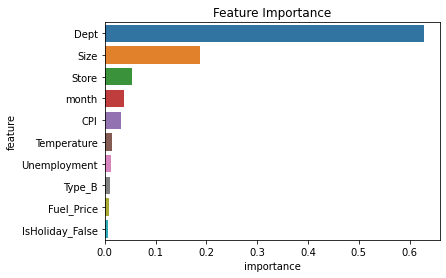

In [ ]:
import seaborn as sns
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Feature engineering on test dataset**

In [ ]:
test[numeric_cols] = imputer.transform(test[numeric_cols])
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month
0,1.0,1.0,2012-11-02,False,A,151315.0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,2012.0,11.0
1,1.0,1.0,2012-11-09,False,A,151315.0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573000,2012.0,11.0
2,1.0,1.0,2012-11-16,False,A,151315.0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573000,2012.0,11.0
3,1.0,1.0,2012-11-23,True,A,151315.0,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573000,2012.0,11.0
4,1.0,1.0,2012-11-30,False,A,151315.0,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573000,2012.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45.0,98.0,2013-06-28,False,B,118221.0,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,171.201947,7.960289,2013.0,6.0
115060,45.0,98.0,2013-07-05,False,B,118221.0,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,171.201947,7.960289,2013.0,7.0
115061,45.0,98.0,2013-07-12,False,B,118221.0,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,171.201947,7.960289,2013.0,7.0
115062,45.0,98.0,2013-07-19,False,B,118221.0,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,171.201947,7.960289,2013.0,7.0


In [ ]:
test[encoded_cols] = encoder.transform(test[cat_cols])
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1.0,1.0,2012-11-02,False,A,151315.0,55.32,3.386,6766.44,5147.70,...,2737.42,223.462779,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,2012-11-09,False,A,151315.0,61.24,3.314,11421.32,3370.89,...,6154.16,223.481307,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,2012-11-16,False,A,151315.0,52.92,3.252,9696.28,292.10,...,6612.69,223.512911,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,2012-11-23,True,A,151315.0,56.23,3.211,883.59,4.17,...,303.32,223.561947,6.573000,2012.0,11.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,2012-11-30,False,A,151315.0,52.34,3.207,2460.03,NaN,...,6966.34,223.610984,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45.0,98.0,2013-06-28,False,B,118221.0,76.05,3.639,4842.29,975.03,...,3169.69,171.201947,7.960289,2013.0,6.0,1.0,0.0,0.0,1.0,0.0
115060,45.0,98.0,2013-07-05,False,B,118221.0,77.50,3.614,9090.48,2268.58,...,1514.93,171.201947,7.960289,2013.0,7.0,1.0,0.0,0.0,1.0,0.0
115061,45.0,98.0,2013-07-12,False,B,118221.0,79.37,3.614,3789.94,1827.31,...,2150.36,171.201947,7.960289,2013.0,7.0,1.0,0.0,0.0,1.0,0.0
115062,45.0,98.0,2013-07-19,False,B,118221.0,82.84,3.737,2961.49,1047.07,...,1059.46,171.201947,7.960289,2013.0,7.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
test=test[numeric_cols+encoded_cols]
test

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1.0,1.0,151315.0,55.32,3.386,223.462779,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,151315.0,61.24,3.314,223.481307,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,151315.0,52.92,3.252,223.512911,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,151315.0,56.23,3.211,223.561947,6.573000,2012.0,11.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,151315.0,52.34,3.207,223.610984,6.573000,2012.0,11.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45.0,98.0,118221.0,76.05,3.639,171.201947,7.960289,2013.0,6.0,1.0,0.0,0.0,1.0,0.0
115060,45.0,98.0,118221.0,77.50,3.614,171.201947,7.960289,2013.0,7.0,1.0,0.0,0.0,1.0,0.0
115061,45.0,98.0,118221.0,79.37,3.614,171.201947,7.960289,2013.0,7.0,1.0,0.0,0.0,1.0,0.0
115062,45.0,98.0,118221.0,82.84,3.737,171.201947,7.960289,2013.0,7.0,1.0,0.0,0.0,1.0,0.0


**Predictions by the Random forest model**

In [ ]:
preds=model.predict(test)
preds.shape

(115064,)

In [ ]:
preds

array([30201.32577398, 19045.95909557, 20441.76553727, ...,
         512.9457689 ,   539.87925224,   528.73136508])

**XGBOOST Model**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
modelX = XGBRegressor(random_state=42, n_jobs=-1)
modelX.fit(X_train,X_target)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
base_score=modelX.score(X_train,X_target)
base_score

0.7351312525853806

In [ ]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1.0,1.0,2010-02-05,24924.50,False,A,151315.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,2010-02-12,46039.49,True,A,151315.0,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010.0,2.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,2010-02-19,41595.55,False,A,151315.0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,2010-02-26,19403.54,False,A,151315.0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010.0,2.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,2010-03-05,21827.90,False,A,151315.0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010.0,3.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,98.0,2012-09-28,508.37,False,B,118221.0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012.0,9.0,1.0,0.0,0.0,1.0,0.0
421566,45.0,98.0,2012-10-05,628.10,False,B,118221.0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421567,45.0,98.0,2012-10-12,1061.02,False,B,118221.0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0
421568,45.0,98.0,2012-10-19,760.01,False,B,118221.0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012.0,10.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
def test_params2(**params):
    modelX =XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, X_target)
    return modelX.score(X_train, X_target), modelX.score(val, val_target)

In [ ]:
test_params2(n_estimators=50)

(0.9165371071108012, 0.9319216294844294)

In [ ]:
test_params2(n_estimators=300)

(0.9660656458249306, 0.9586929241798879)

In [ ]:
test_params2(n_estimators=600)

(0.9778856943697657, 0.9624240856804375)

In [ ]:
test_params2(max_depth=10)

(0.9874657393668707, 0.9668478641681487)

In [ ]:
test_params2(max_depth=20)

(0.9999746198325778, 0.969185129429848)

In [ ]:
test_params2(max_depth=30)

(0.9999999999946318, 0.967665431173074)

In [ ]:
test_params2(max_depth=25)

(0.9999999559972511, 0.967608177018547)

In [ ]:
test_params2(max_depth=20,n_estimators=600)

(0.9999999999930191, 0.9691526499493843)

In [ ]:
test_params2(max_depth=15,n_estimators=500)

(0.9999826638450214, 0.9690715838966208)

In [ ]:
test_params2(max_depth=15,n_estimators=400)

(0.9999578377535718, 0.9690837667723494)

In [ ]:
test_params2(max_depth=10,n_estimators=400)

(0.9965324364438319, 0.9666226801178165)

In [ ]:
test_params2(max_depth=10,n_estimators=500)

(0.997405984196339, 0.9665246928527526)

In [ ]:
test_params2(max_depth=10,n_estimators=600)

(0.9979626623151698, 0.9663787267344754)

The best hyperparameters after tunning are max_depth=10 and n_estimators=400

In [ ]:
modelF =XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400,max_depth=10).fit(X_train, X_target)
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Dept,0.627416
2,Size,0.187844
0,Store,0.053822
8,month,0.037400
5,CPI,0.031899
3,Temperature,0.015094
6,Unemployment,0.012545
12,Type_B,0.010619
4,Fuel_Price,0.009049
9,IsHoliday_False,0.005661


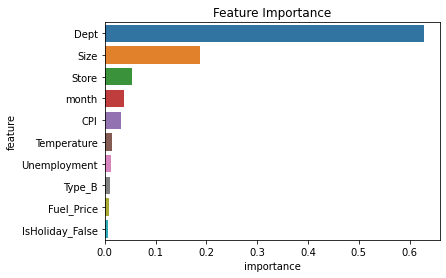

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### The most imporatant thing to keep in mind while maximizing sales is focusing on various departments along with the size of the store.

In [ ]:
preds2=modelF.predict(test)

NameError: ignored

In [ ]:
preds2

In [ ]:
preds2.shape

In [ ]:
sample_sub["Weekly_Sales"]=preds

In [ ]:
sample_sub

In [ ]:
sample_sub.to_csv('submission.csv', index=False)
from IPython.display import FileLink
FileLink('submission.csv')